# Cálculos $\dot{Q}$ generado por cada material

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import import_ipynb

Datos necesarios a importar:
- $U_{T1}$: Coef. transferencia de calor por unidad de ancho de tabique 1 $W/mK$
- $U_{T2}$: Coef. transferencia de calor por unidad de ancho de tabique 2 $W/mK$
- $U_{T3}$: Coef. transferencia de calor por unidad de ancho de tabique 3 $W/mK$
- $U_{T4}$: Coef. transferencia de calor por unidad de ancho de tabique 4 $W/mK$
- $U_{HA}$: Coef. transferencia de calor por unidad de ancho de hormigón harmado $W/mK$
- $U_{V01}$: Coef. transferencia de calor por unidad de ancho de ventana V01 $W/mK$
- $U_{V02}$: Coef. transferencia de calor por unidad de ancho de ventana V02 $W/mK$
- $U_{MV17}$: Coef. transferencia de calor por unidad de ancho de ventana MV17 $W/mK$
- $U_{MV18}$: Coef. transferencia de calor por unidad de ancho de ventana MV18 $W/mK$
- $U_{MV19}$: Coef. transferencia de calor por unidad de ancho de ventana MV19 $W/mK$
- $U_{PM05}$: Coef. transferencia de calor de la puerta $W/K$
- $U_{suelo}$: Coef. transferencia de calor del suelo $W/K$
- $U_{techo}$: Coef. transferencia de calor del techo $W/K$

In [47]:
from calculos_U import U_T1, U_T2, U_T3, U_T4, U_T5, U_HA, U_techo, U_MV17, U_MV18, U_MV19, U_PM05, U_suelo, U_V01, U_V02, U_imposta, U_closet, resistencias_superficie

Funciones para calcular el calor

In [48]:
altura = 2.715  # Altura estándar de una habitación en metros

def perdidas(T_in, T_out, U, area, tipo, t=None, GH=None):
    '''Se utiliza cuando U está exprersado en unidad de área (W/m²·K)'''
    U_total = ((1/U) + resistencias_superficie[tipo])**-1  # Coeficiente global considerando resistencia de superficie
    dot_Q = U_total * area * abs(T_in - T_out)

    if t is not None:
        Q = dot_Q * t  # Energía total en tiempo t
    elif GH is not None:
        Q = U_total * area * GH  # Energía total usando GH
    else:
        Q = 'No se ha calculado'

    return dot_Q, Q

In [49]:
dot_Q_oficinas = dict()

## Definición de temperaturas en cada oficina

In [50]:
T_oficinas = 22  # °C
T_exterior_inv = 5  # °C
T_exterior_ver = 30  # °C

## Oficina 1

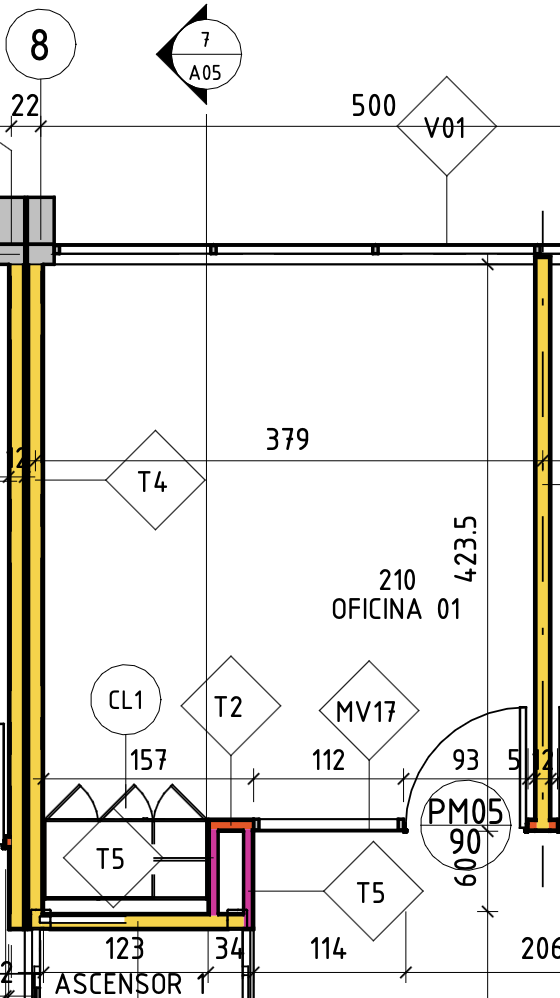

In [51]:
# Pérdidas por tabiques tipo T4
largo_T4 = (423.5 + 123 + 423.5 + 60) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (34 + 5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T5 = (60 - 12 - 9) * 1e-2
area = largo_T5 * altura
dot_Q_T5_inv, Q_T5_inv = perdidas(T_oficinas, T_exterior_inv, U_T5, area=area, tipo='Horizontal, interior')
# Pérdidas por tabiques ventanas MV01:
area_MV01 = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV17:
area_MV17 = (112e-2) * (2715e-3)
dot_Q_MV17_inv, Q_MV17_inv = perdidas(T_oficinas, T_exterior_inv, U_MV17, area=area_MV17, tipo='Horizontal, interior')
# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')
# Pérdidas por suelo:
area_suelo = ((423.5e-2) * (379e-2)) + ((123e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))


+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  238.89 |
+--------------+-------------------------+
| Tabique T2   |                    9.7  |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  578.48 |
+--------------+-------------------------+
| Techo        |                 1086.44 |
+--------------+-------------------------+


In [52]:
# Calculamos el calor total perdido en la oficina
dot_Q_oficina_1 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T5_inv + dot_Q_MV01_inv +
                   dot_Q_MV17_inv + dot_Q_PM05_inv + dot_Q_imposta_inv +
                   dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 1'] = dot_Q_oficina_1

## Oficina 2

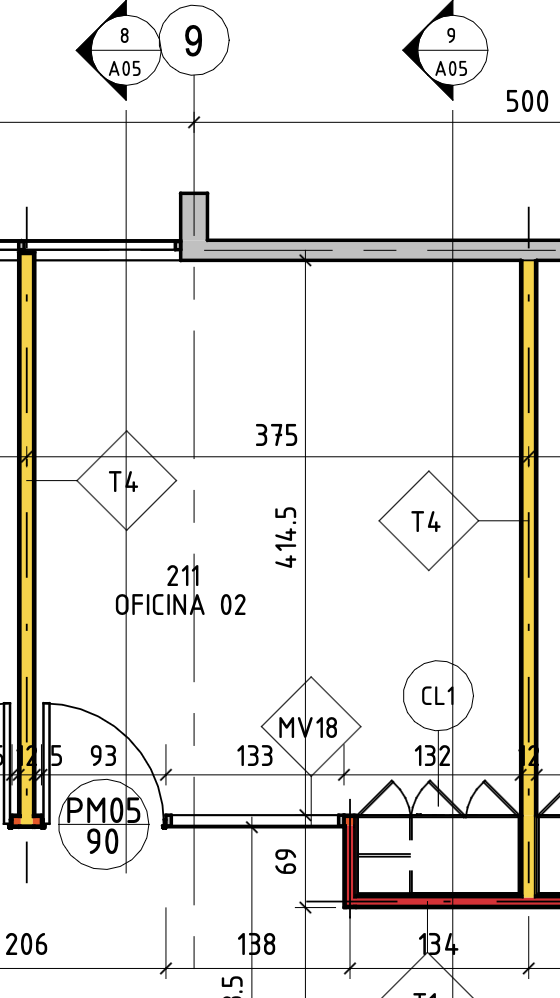

In [53]:
# Pérdidas por tabiques tipo T4
largo_T4 = (414.5 + 414.5 + 69) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (134+69) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = ((500-379)*1e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por hormigón armado HA:
largo_HA = (375 + 379 - 500) * 1e-2
area_HA = largo_HA * altura
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')
# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((414.5e-2) * (375e-2)) + ((132e-2) * (69e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T1", f"{dot_Q_T1_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Hormigón Armado HA", f"{dot_Q_HA_inv:.2f}"],
    ["Ventana MV18", f"{dot_Q_MV18_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+-------------------------+
| Elemento           |   Pérdidas de calor (W) |
+====================+=========================+
| Tabique T4         |                  208.28 |
+--------------------+-------------------------+
| Tabique T2         |                    1.24 |
+--------------------+-------------------------+
| Tabique T1         |                   50.24 |
+--------------------+-------------------------+
| Ventana MV01       |                   86.45 |
+--------------------+-------------------------+
| Hormigón Armado HA |                  400.53 |
+--------------------+-------------------------+
| Ventana MV18       |                  250.56 |
+--------------------+-------------------------+
| Puerta PM05        |                   48.51 |
+--------------------+-------------------------+
| Imposta            |                   22.16 |
+--------------------+-------------------------+
| Suelo              |                  566.97 |
+-------------------

In [54]:
dot_Q_oficina_2 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 2'] = dot_Q_oficina_2


## Oficina 3

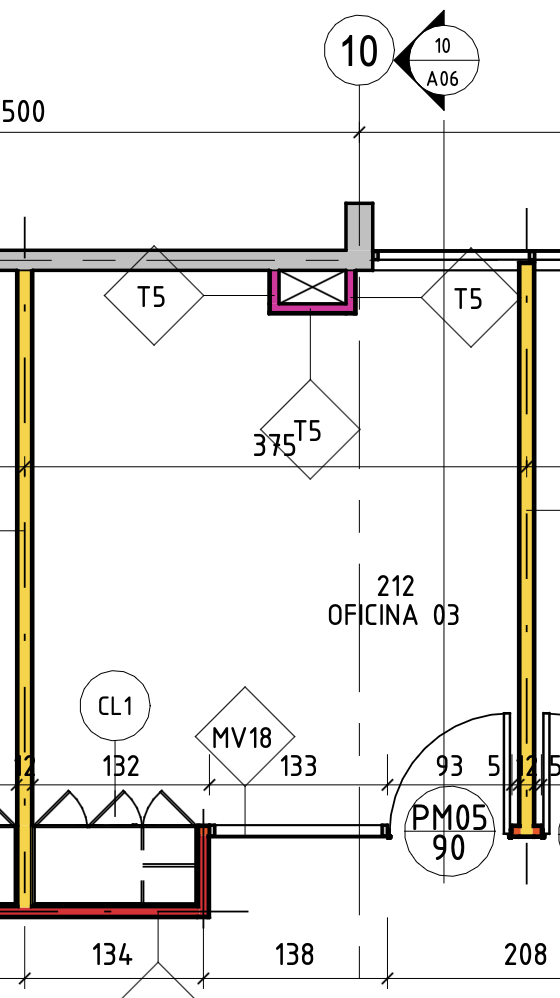

Es igual que oficina 2

In [55]:
# Pérdidas por tabiques tipo T4
largo_T4 = (414.5 + 414.5 + 69) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (134+69) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = ((500-379)*1e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por hormigón armado HA:
largo_HA = (375 + 379 - 500) * 1e-2
area_HA = largo_HA * altura
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((414.5e-2) * (375e-2)) + ((132e-2) * (69e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T1", f"{dot_Q_T1_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Hormigón Armado HA", f"{dot_Q_HA_inv:.2f}"],
    ["Ventana MV18", f"{dot_Q_MV18_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+-------------------------+
| Elemento           |   Pérdidas de calor (W) |
+====================+=========================+
| Tabique T4         |                  208.28 |
+--------------------+-------------------------+
| Tabique T2         |                    1.24 |
+--------------------+-------------------------+
| Tabique T1         |                   50.24 |
+--------------------+-------------------------+
| Ventana MV01       |                   86.45 |
+--------------------+-------------------------+
| Hormigón Armado HA |                  400.53 |
+--------------------+-------------------------+
| Ventana MV18       |                  250.56 |
+--------------------+-------------------------+
| Puerta PM05        |                   48.51 |
+--------------------+-------------------------+
| Imposta            |                   22.16 |
+--------------------+-------------------------+
| Suelo              |                  566.97 |
+-------------------

In [56]:
dot_Q_oficina_3 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 3'] = dot_Q_oficina_3

## Oficina 4

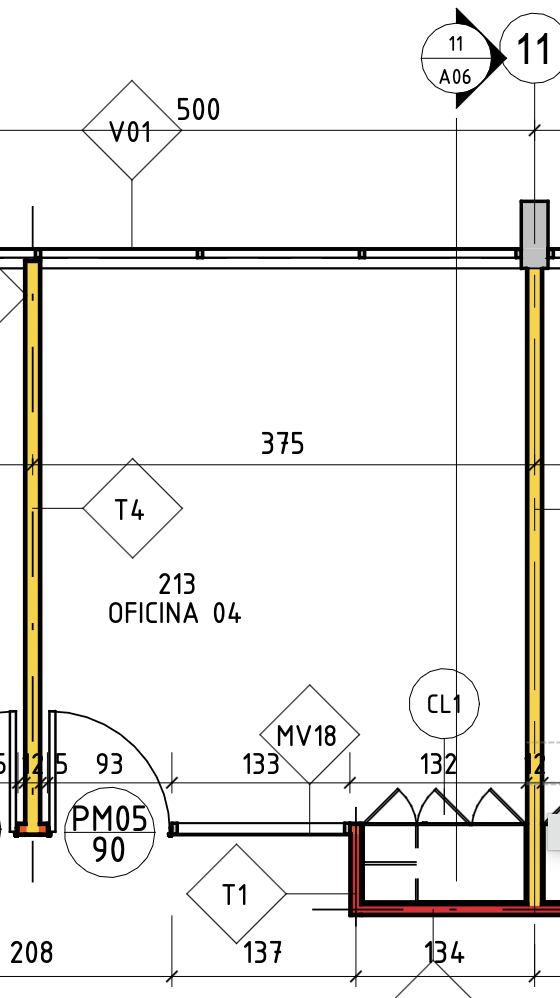

In [57]:
# Pérdidas por tabiques tipo T4
largo_T4 = (414.5 + 414.5 + 69) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (69 + 134) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = (375e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')


# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((414.5e-2) * (375e-2)) + ((132e-2) * (69e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  267.92 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  566.97 |
+--------------+-------------------------+
| Techo        |                 1064.82 |
+--------------+-------------------------+


In [58]:
dot_Q_oficina_4 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 4'] = dot_Q_oficina_4

## Oficina 5

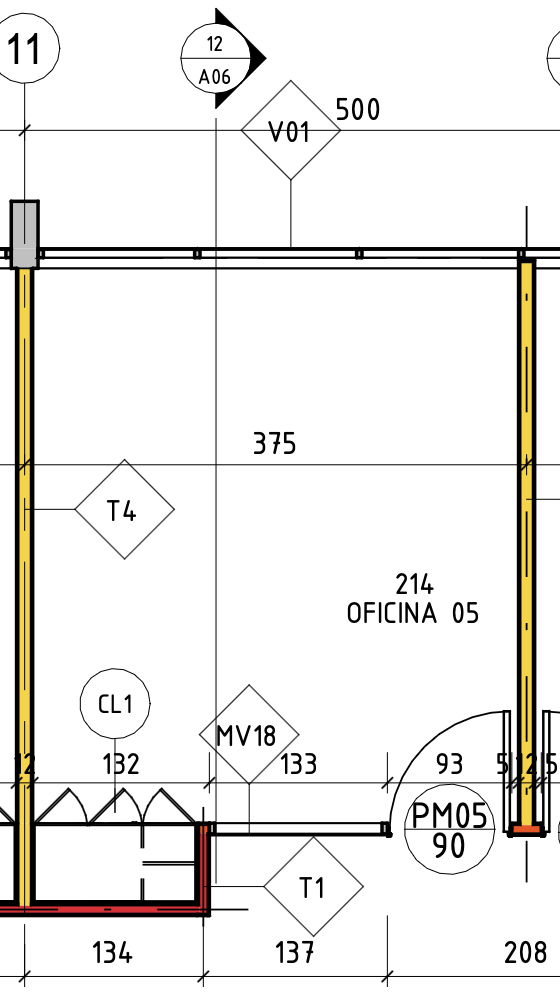

Es igual que oficina 4

In [59]:
# Pérdidas por tabiques tipo T4
largo_T4 = (414.5 + 414.5 + 69) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (69 + 134) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = (375e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((414.5e-2) * (375e-2)) + ((132e-2) * (69e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  267.92 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  566.97 |
+--------------+-------------------------+
| Techo        |                 1064.82 |
+--------------+-------------------------+


In [60]:
dot_Q_oficina_5 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 5'] = dot_Q_oficina_5

## Oficina 6

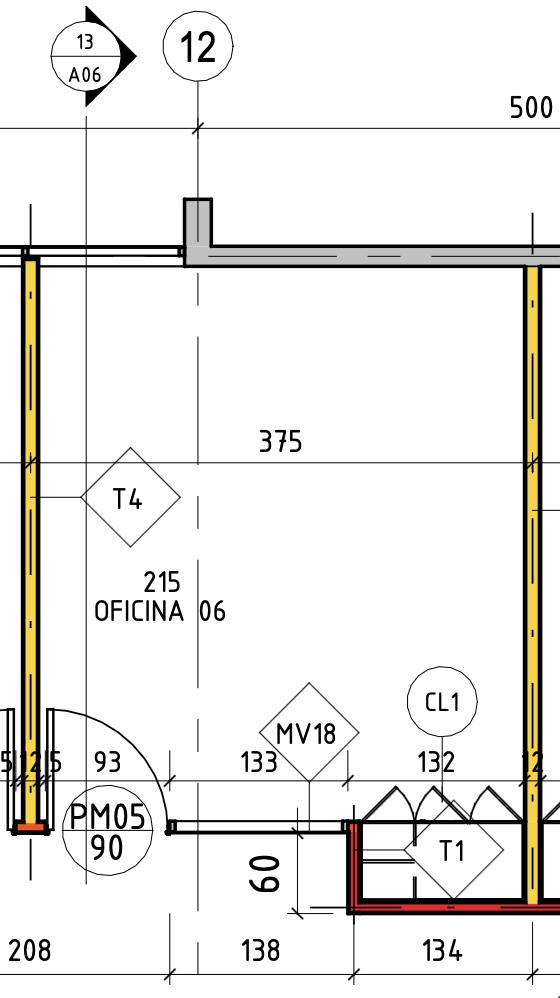

Es igual que oficina 2

In [61]:
# Pérdidas por tabiques tipo T4
largo_T4 = (414.5 + 414.5 + 69) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (134+69) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = ((500-375)*1e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por hormigón armado HA:
largo_HA = (375 + 379 - 500) * 1e-2
area_HA = largo_HA * altura
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((414.5e-2) * (375e-2)) + ((132e-2) * (69e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T1", f"{dot_Q_T1_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Hormigón Armado HA", f"{dot_Q_HA_inv:.2f}"],
    ["Ventana MV18", f"{dot_Q_MV18_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))



+--------------------+-------------------------+
| Elemento           |   Pérdidas de calor (W) |
+====================+=========================+
| Tabique T4         |                  208.28 |
+--------------------+-------------------------+
| Tabique T2         |                    1.24 |
+--------------------+-------------------------+
| Tabique T1         |                   50.24 |
+--------------------+-------------------------+
| Ventana MV01       |                   89.31 |
+--------------------+-------------------------+
| Hormigón Armado HA |                  400.53 |
+--------------------+-------------------------+
| Ventana MV18       |                  250.56 |
+--------------------+-------------------------+
| Puerta PM05        |                   48.51 |
+--------------------+-------------------------+
| Imposta            |                   22.16 |
+--------------------+-------------------------+
| Suelo              |                  566.97 |
+-------------------

In [62]:
dot_Q_oficina_6 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 6'] = dot_Q_oficina_6

## Oficina 7

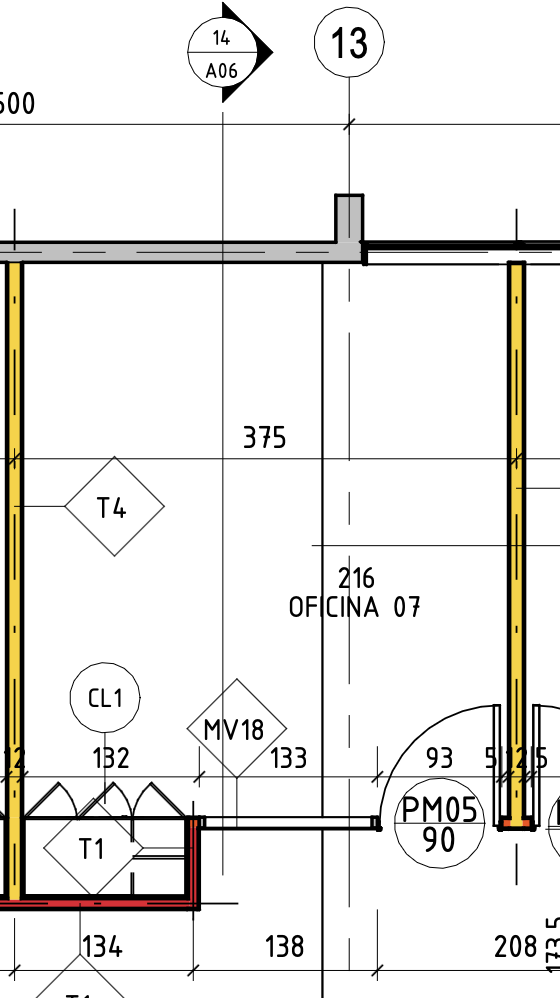

Es igual que oficina 2

In [63]:
# Pérdidas por tabiques tipo T4
largo_T4 = (414.5 + 414.5 + 69) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (134+69) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = ((500-375)*1e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por hormigón armado HA:
largo_HA = (375 + 379 - 500) * 1e-2
area_HA = largo_HA * altura
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((414.5e-2) * (375e-2)) + ((132e-2) * (69e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T1", f"{dot_Q_T1_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Hormigón Armado HA", f"{dot_Q_HA_inv:.2f}"],
    ["Ventana MV18", f"{dot_Q_MV18_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+-------------------------+
| Elemento           |   Pérdidas de calor (W) |
+====================+=========================+
| Tabique T4         |                  208.28 |
+--------------------+-------------------------+
| Tabique T2         |                    1.24 |
+--------------------+-------------------------+
| Tabique T1         |                   50.24 |
+--------------------+-------------------------+
| Ventana MV01       |                   89.31 |
+--------------------+-------------------------+
| Hormigón Armado HA |                  400.53 |
+--------------------+-------------------------+
| Ventana MV18       |                  250.56 |
+--------------------+-------------------------+
| Puerta PM05        |                   48.51 |
+--------------------+-------------------------+
| Imposta            |                   22.16 |
+--------------------+-------------------------+
| Suelo              |                  566.97 |
+-------------------

In [64]:
dot_Q_oficina_7 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 7'] = dot_Q_oficina_7

## Oficina 8

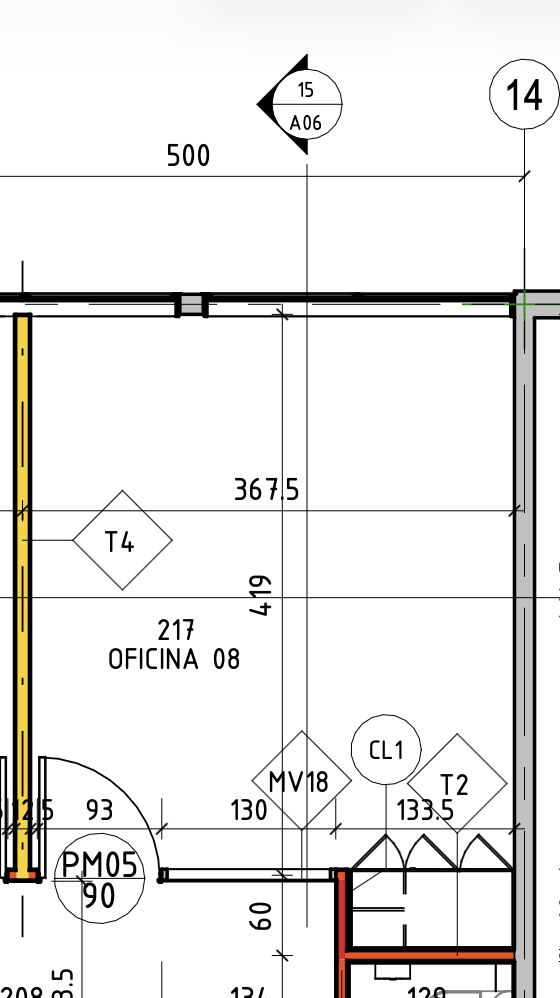

In [65]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5 + 133.5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (60) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_MV01 = ((367.5)*1e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_MV01, tipo='Horizontal, exterior')

# Pérdidas por hormigón armado HA:
largo_HA = (419 + 60) * 1e-2
area_HA = largo_HA * altura
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')
# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (367.5e-2)) + ((133.5e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')

# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T1", f"{dot_Q_T1_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Hormigón Armado HA", f"{dot_Q_HA_inv:.2f}"],
    ["Ventana MV18", f"{dot_Q_MV18_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+-------------------------+
| Elemento           |   Pérdidas de calor (W) |
+====================+=========================+
| Tabique T4         |                   97.18 |
+--------------------+-------------------------+
| Tabique T2         |                   34.44 |
+--------------------+-------------------------+
| Tabique T1         |                   14.85 |
+--------------------+-------------------------+
| Ventana MV01       |                  262.56 |
+--------------------+-------------------------+
| Hormigón Armado HA |                  755.32 |
+--------------------+-------------------------+
| Ventana MV18       |                  250.56 |
+--------------------+-------------------------+
| Puerta PM05        |                   48.51 |
+--------------------+-------------------------+
| Imposta            |                   22.16 |
+--------------------+-------------------------+
| Suelo              |                  558.17 |
+-------------------

In [66]:
dot_Q_oficina_8 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 8'] = dot_Q_oficina_8


## Oficina 9

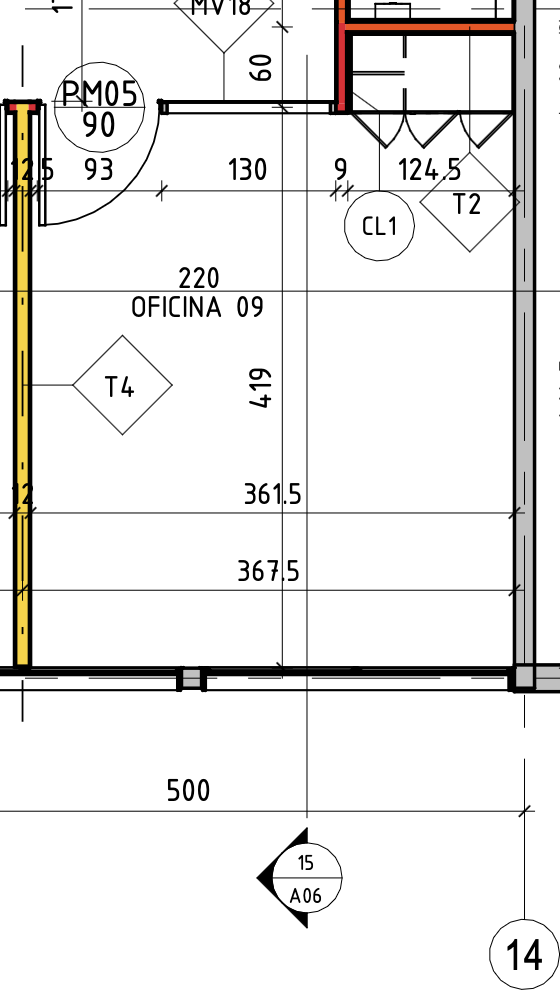

In [67]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5 + 124.5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T1 = (60) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (414.5 + 361.5) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (361.5e-2)) + ((124.5e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                   97.18 |
+--------------+-------------------------+
| Tabique T2   |                   32.2  |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  547.65 |
+--------------+-------------------------+
| Techo        |                 1028.53 |
+--------------+-------------------------+


In [68]:
dot_Q_oficina_9 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 9'] = dot_Q_oficina_9

## Oficina 10

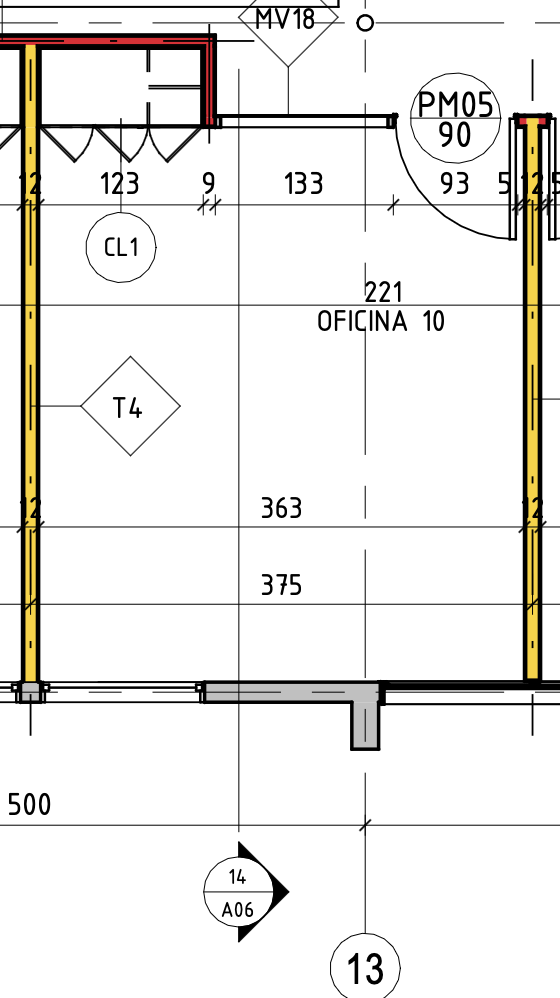

In [69]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419 + 60) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T1 = (60 + 133.5) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (363) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((123e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))



+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  549.5  |
+--------------+-------------------------+
| Techo        |                 1032.02 |
+--------------+-------------------------+


In [70]:
dot_Q_oficina_10 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 10'] = dot_Q_oficina_10

## Oficina 11

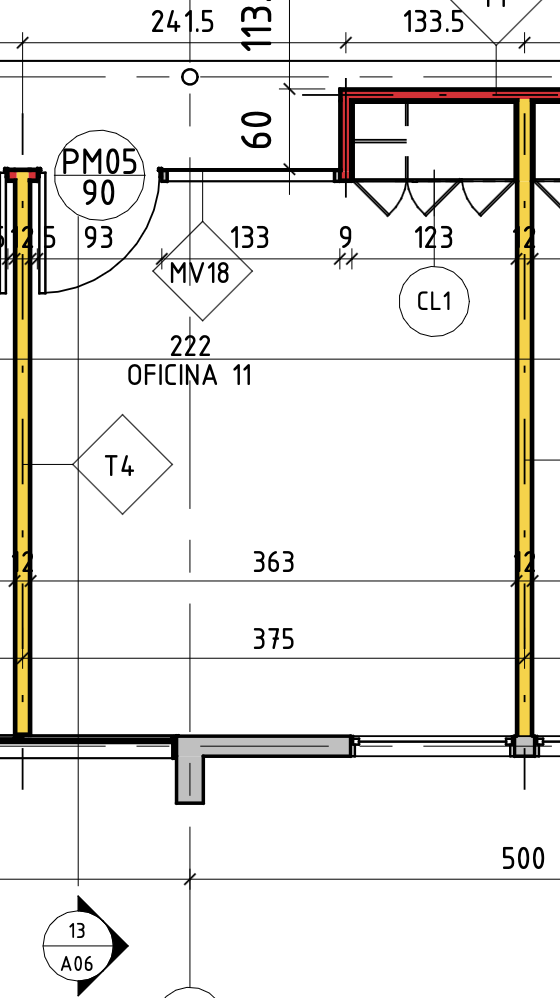

In [71]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419 + 60) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T1 = (60 + 133.5) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (363) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((123e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))



+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  549.5  |
+--------------+-------------------------+
| Techo        |                 1032.02 |
+--------------+-------------------------+


In [72]:
Q_dot_oficina_11 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 11'] = Q_dot_oficina_11

## Oficina 12

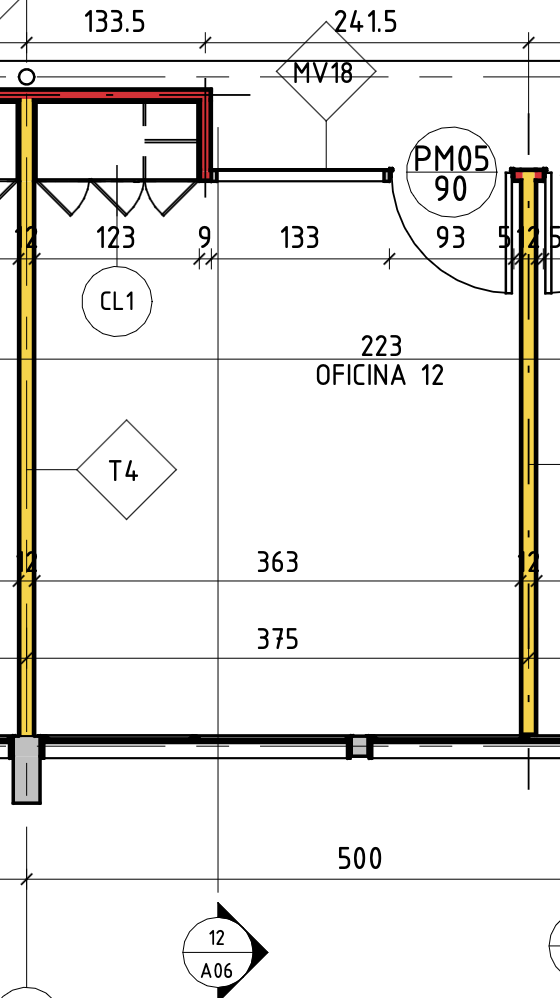

In [73]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419 + 60) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T1 = (60 + 133.5) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (363) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((123e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  549.5  |
+--------------+-------------------------+
| Techo        |                 1032.02 |
+--------------+-------------------------+


In [74]:
Q_dot_oficina_12 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                   dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                   dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 12'] = Q_dot_oficina_12

## Oficina 13

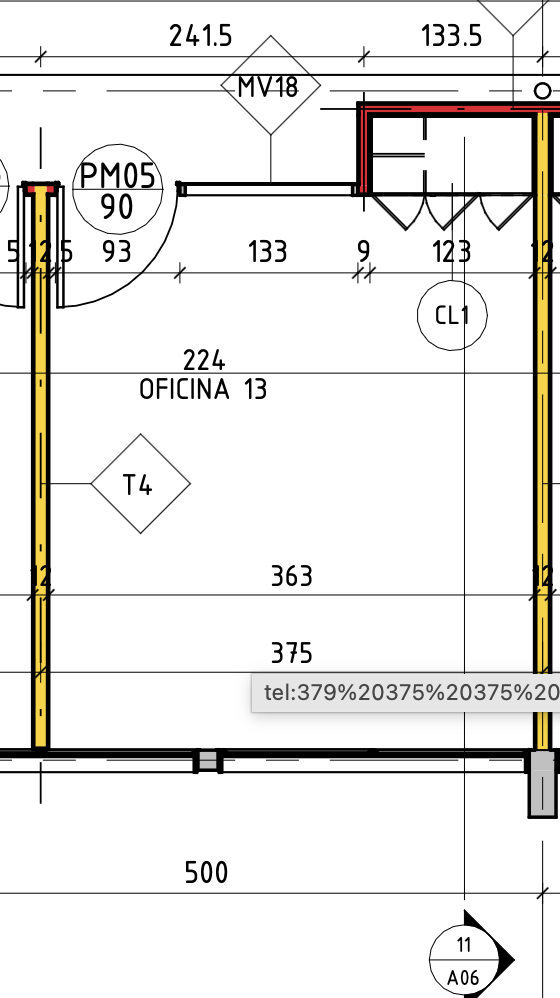

In [75]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419 + 60) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T1 = (60 + 133.5) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (363) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((123e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))



+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   10.25 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  549.5  |
+--------------+-------------------------+
| Techo        |                 1032.02 |
+--------------+-------------------------+


In [76]:
Q_dot_oficina_13 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                     dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                     dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv) 
dot_Q_oficinas['Oficina 13'] = Q_dot_oficina_13

## Oficina 14

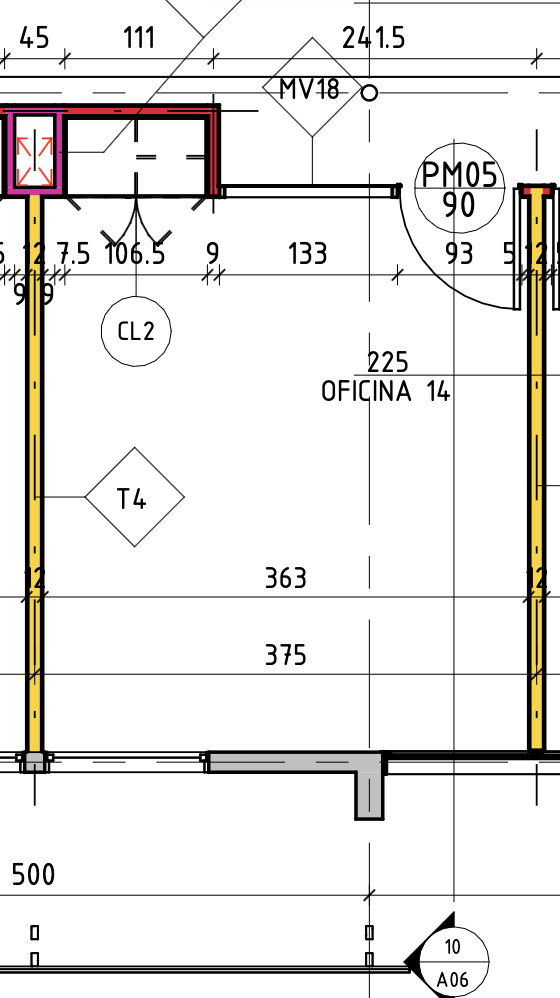

In [77]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T2:
largo_T2 = (5) * 1e-2
area = largo_T2 * altura
dot_Q_T2_inv, Q_T2_inv = perdidas(T_oficinas, T_exterior_inv, U_T2, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (60 + 111) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T5 = (60) * 1e-2
area = largo_T5 * altura
dot_Q_T5_inv, Q_T5_inv = perdidas(T_oficinas, T_exterior_inv, U_T5, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (363) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((111e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))


+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  194.36 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   15.76 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  547.02 |
+--------------+-------------------------+
| Techo        |                 1027.36 |
+--------------+-------------------------+


In [78]:
Q_dot_oficina_14 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                     dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                     dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)
dot_Q_oficinas['Oficina 14'] = Q_dot_oficina_14

## Oficina 15

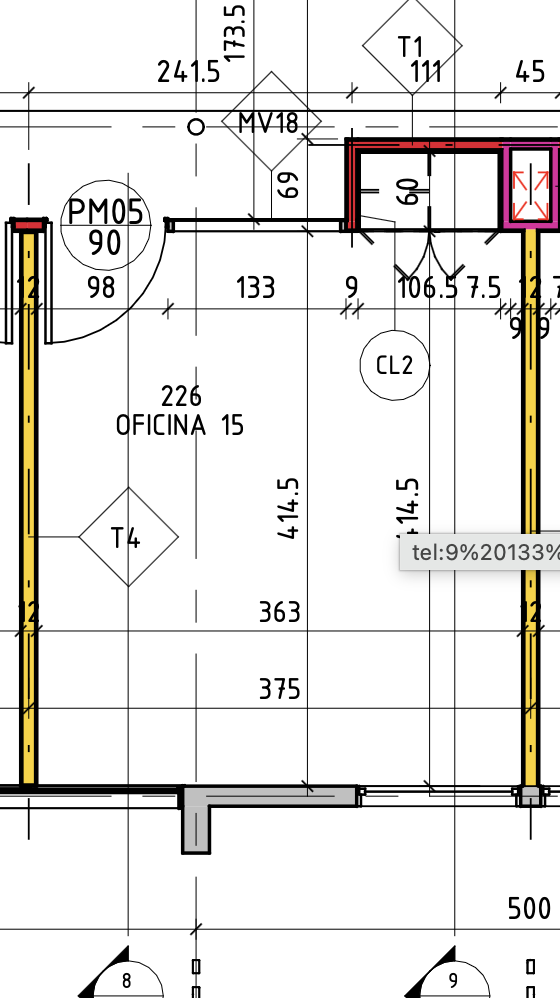

In [79]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')


# Pérdidas por tabiques tipo T1:
largo_T1 = (60 + 111) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T5:
largo_T5 = (60) * 1e-2
area = largo_T5 * altura
dot_Q_T5_inv, Q_T5_inv = perdidas(T_oficinas, T_exterior_inv, U_T5, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (363) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV18:
area_MV18 = (133e-2) * (2715e-3)
dot_Q_MV18_inv, Q_MV18_inv = perdidas(T_oficinas, T_exterior_inv, U_MV18, area=area_MV18, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((111e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))


+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  194.36 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   15.76 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  547.02 |
+--------------+-------------------------+
| Techo        |                 1027.36 |
+--------------+-------------------------+


In [80]:
Q_dot_oficina_15 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                     dot_Q_HA_inv + dot_Q_MV18_inv + dot_Q_PM05_inv +
                     dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 15'] = Q_dot_oficina_15

## Oficina 16

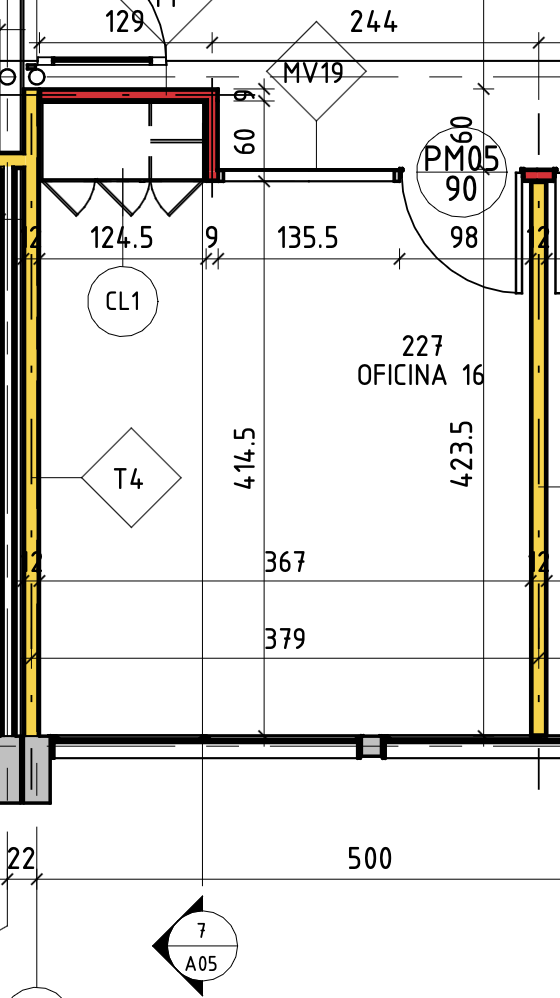

In [81]:
# Pérdidas por tabiques tipo T4
largo_T4 = (419 + 419 + 60) * 1e-2
area = largo_T4 * altura
dot_Q_T4_inv, Q_T4_inv = perdidas(T_oficinas, T_exterior_inv, U_T4, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques tipo T1:
largo_T1 = (60 + 129 + 5) * 1e-2
area = largo_T1 * altura
dot_Q_T1_inv, Q_T1_inv = perdidas(T_oficinas, T_exterior_inv, U_T1, area=area, tipo='Horizontal, interior')

# Pérdidas por tabiques ventanas MV01:
area_ventana = (379e-2) * (2715e-3)
dot_Q_MV01_inv, Q_MV01_inv = perdidas(T_oficinas, T_exterior_inv, U_V01, area=area_ventana, tipo='Horizontal, exterior')

# Perdidas por hormigón armado HA:
largo_HA = (367) * 1e-2
area_HA = largo_HA * altura - area_ventana
dot_Q_HA_inv, Q_HA_inv = perdidas(T_oficinas, T_exterior_inv, U_HA, area=area_HA, tipo='Horizontal, exterior')

# Pérdidas por ventanas MV19:
area_MV19 = (136e-2) * (2715e-3)
dot_Q_MV19_inv, Q_MV19_inv = perdidas(T_oficinas, T_exterior_inv, U_MV19, area=area_MV19, tipo='Horizontal, interior')

# Pérdidas por puerta PM05:
a_puerta = (90e-2) * (210e-2)
dot_Q_PM05_inv, Q_PM05_inv = perdidas(T_oficinas, T_exterior_inv, U_PM05, area=a_puerta, tipo='Horizontal, interior')

# Pérdidas por imposta:
area_imposta = (90e-2) * (60e-2)
dot_Q_imposta_inv, Q_imposta_inv = perdidas(T_oficinas, T_exterior_inv, U_imposta, area=area_imposta, tipo='Horizontal, interior')

# Pérdidas por suelo:
area_suelo = ((419e-2) * (363e-2)) + ((123e-2) * (60e-2))
dot_Q_suelo_inv, Q_suelo_inv = perdidas(T_oficinas, T_exterior_inv, U_suelo, area=area_suelo, tipo='Vertical, hacia abajo, interior')

# Pérdidas por el techo:
area_techo = area_suelo
dot_Q_techo_inv, Q_techo_inv = perdidas(T_oficinas, T_exterior_inv, U_techo, area=area_techo, tipo='Vertical, hacia arriba, exterior')
# Print a table with the results
headers = ["Elemento", "Pérdidas de calor (W)"]
data = [
    ["Tabique T4", f"{dot_Q_T4_inv:.2f}"],
    ["Tabique T2", f"{dot_Q_T2_inv:.2f}"],
    ["Tabique T5", f"{dot_Q_T5_inv:.2f}"],
    ["Ventana MV01", f"{dot_Q_MV01_inv:.2f}"],
    ["Ventana MV17", f"{dot_Q_MV17_inv:.2f}"],
    ["Puerta PM05", f"{dot_Q_PM05_inv:.2f}"],
    ["Imposta", f"{dot_Q_imposta_inv:.2f}"],
    ["Suelo", f"{dot_Q_suelo_inv:.2f}"],
    ["Techo", f"{dot_Q_techo_inv:.2f}"],
]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------------+
| Elemento     |   Pérdidas de calor (W) |
+==============+=========================+
| Tabique T4   |                  208.28 |
+--------------+-------------------------+
| Tabique T2   |                    1.24 |
+--------------+-------------------------+
| Tabique T5   |                   15.76 |
+--------------+-------------------------+
| Ventana MV01 |                  270.78 |
+--------------+-------------------------+
| Ventana MV17 |                  210.99 |
+--------------+-------------------------+
| Puerta PM05  |                   48.51 |
+--------------+-------------------------+
| Imposta      |                   22.16 |
+--------------+-------------------------+
| Suelo        |                  549.5  |
+--------------+-------------------------+
| Techo        |                 1032.02 |
+--------------+-------------------------+


In [ ]:
Q_dot_oficina_16 = (dot_Q_T4_inv + dot_Q_T2_inv + dot_Q_T1_inv + dot_Q_MV01_inv +
                     dot_Q_HA_inv + dot_Q_MV19_inv + dot_Q_PM05_inv +
                     dot_Q_imposta_inv + dot_Q_suelo_inv + dot_Q_techo_inv)

dot_Q_oficinas['Oficina 16'] = Q_dot_oficina_16

# Resultados finales

In [83]:
# Print a table with the total heat losses for each office
headers = ["Oficina", "Pérdidas de calor totales (W)"]
data = [[oficina, f"{perdidas:.2f}"] for oficina, perdidas in dot_Q_oficinas.items()]
print(tabulate(data, headers=headers, tablefmt="grid"))

+------------+---------------------------------+
| Oficina    |   Pérdidas de calor totales (W) |
+============+=================================+
| Oficina 1  |                         2476.2  |
+------------+---------------------------------+
| Oficina 2  |                         2699.75 |
+------------+---------------------------------+
| Oficina 3  |                         2699.75 |
+------------+---------------------------------+
| Oficina 4  |                         2881.22 |
+------------+---------------------------------+
| Oficina 5  |                         2881.22 |
+------------+---------------------------------+
| Oficina 6  |                         2702.61 |
+------------+---------------------------------+
| Oficina 7  |                         2702.61 |
+------------+---------------------------------+
| Oficina 8  |                         3092.05 |
+------------+---------------------------------+
| Oficina 9  |                         2938.44 |
+------------+------